In [9]:
raw_output = '''
25.879817030149511 25.879817030149511
18.919754118934918 18.919754118934918
14.520403136923909 14.266256601103253
11.381799256867394 11.090378815359117
8.909127428540593 8.641276041856866
6.951522174733847 6.711483623170958
5.267042839347635 5.058942881506884
3.816203086807230 3.629640609853618
2.502410288368736 2.333633581956334
1.807734789282978 1.550834182634085
'''

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Parse the pasted text into a DataFrame
lines = [ln.strip() for ln in raw_output.strip().split('\n') if ln.strip() and not ln.strip().startswith('#')]

data = []
for idx, ln in enumerate(lines, start=1):
    parts = ln.split()
    if len(parts) < 2:
        continue  # skip malformed lines
    greedy = float(parts[0])
    hybrid = float(parts[1])
    data.append({"k": idx, "greedy": greedy, "hybrid": hybrid})

df = pd.DataFrame(data)
df

,k,greedy,hybrid
0,1,25.879817,25.879817
1,2,18.919754,18.919754
2,3,14.520403,14.266257
3,4,11.381799,11.090379
4,5,8.909127,8.641276
5,6,6.951522,6.711484
6,7,5.267043,5.058943
7,8,3.816203,3.629641
8,9,2.502410,2.333634
9,10,1.807735,1.550834


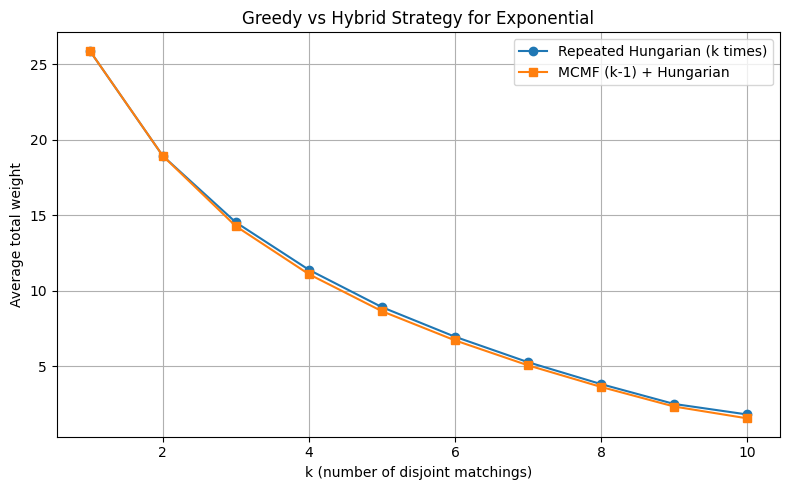

In [10]:
if df.empty:
    print("No valid data parsed. Make sure you pasted the output correctly into raw_output.")
else:
    plt.figure(figsize=(8, 5))
    plt.plot(df["k"], df["greedy"], marker="o", label="Repeated Hungarian (k times)")
    plt.plot(df["k"], df["hybrid"], marker="s", label="MCMF (k-1) + Hungarian")
    plt.xlabel("k (number of disjoint matchings)")
    plt.ylabel("Average total weight")
    plt.title("Greedy vs Hybrid Strategy for Exponential")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()